### Load Dataset

In [1]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Ensembling
from mlxtend.classifier import StackingCVClassifier

In [2]:
data = pd.read_csv("heart.csv") # Reading and converting the data into a pandas dataframe
data.shape # Calculating the dimensions of the dataset

(253680, 22)

In [3]:
data.head(10)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


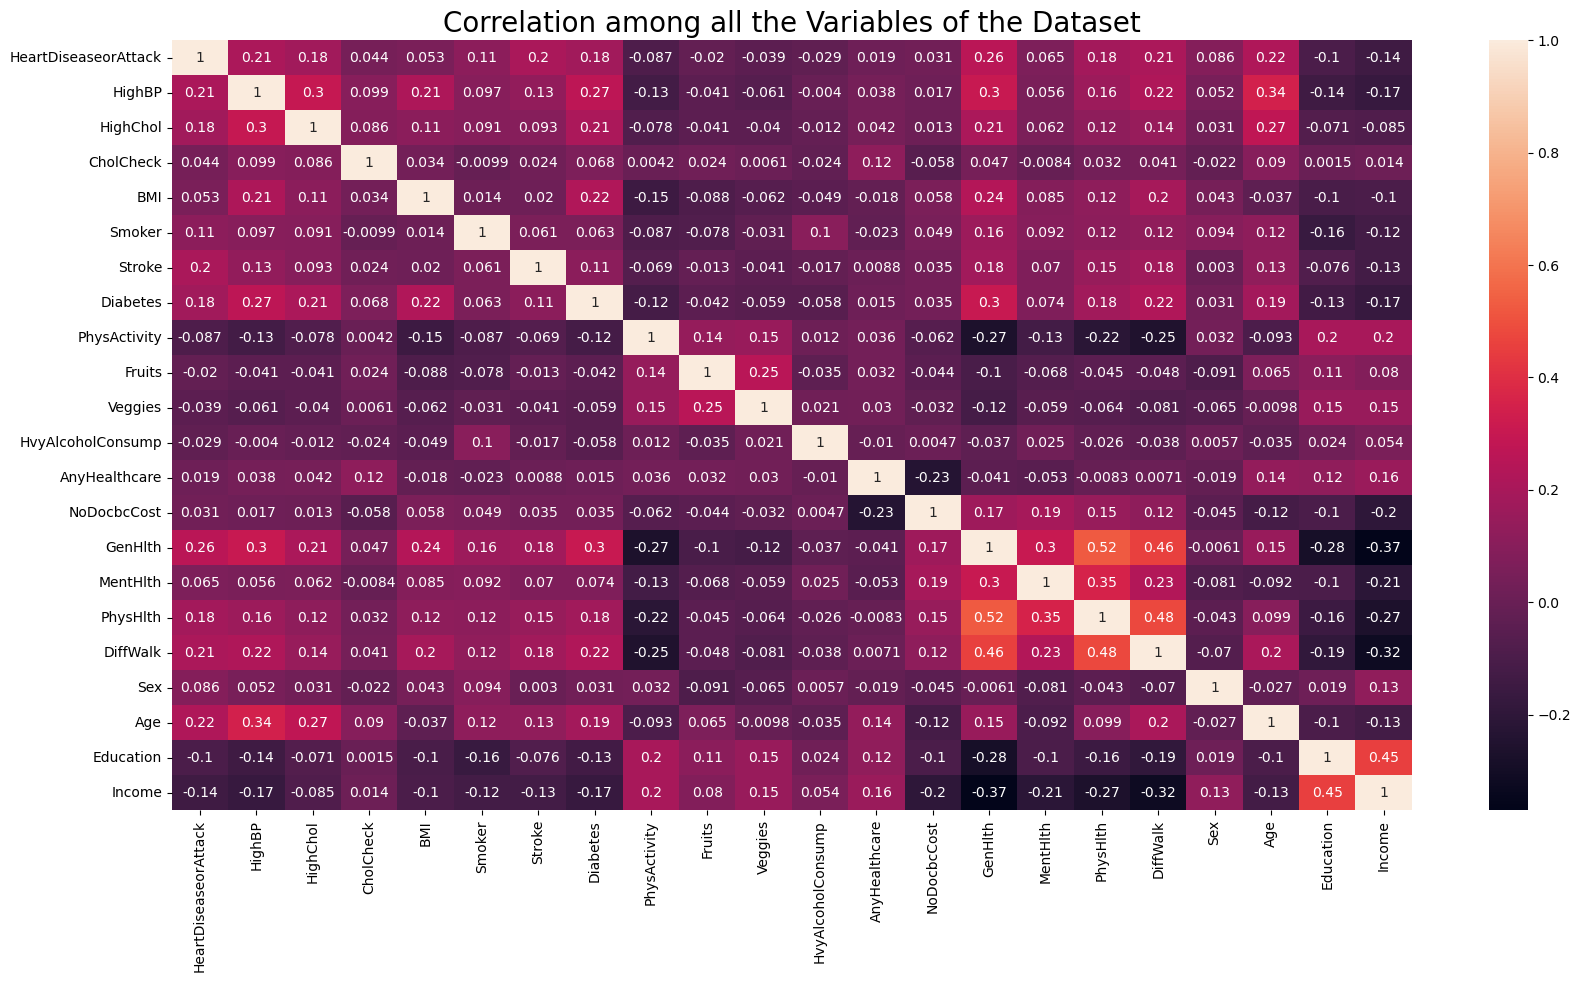

In [5]:
#Checking relationship between variables
cor=data.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

### Feature Selection

In [6]:
#To idenfify the features that have larger contribution towards the outcome variable
X=data.iloc[:,1:22]
y=data.iloc[:,0]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (253680, 21) 
y -  (253680,)


In [7]:
#Apply SelectKBest and extract top 10 features
best=SelectKBest(score_func=chi2, k=10)

In [8]:
fit=best.fit(X,y)

In [9]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [10]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(10,'Score'))

     Feature          Score
15  PhysHlth  150048.810346
14  MentHlth   18277.948957
18       Age   14469.840724
6   Diabetes   13533.426473
5     Stroke   10029.967794
16  DiffWalk    9546.918915
13   GenHlth    7698.920849
0     HighBP    6349.125913
1   HighChol    4773.620749
20    Income    3574.214124


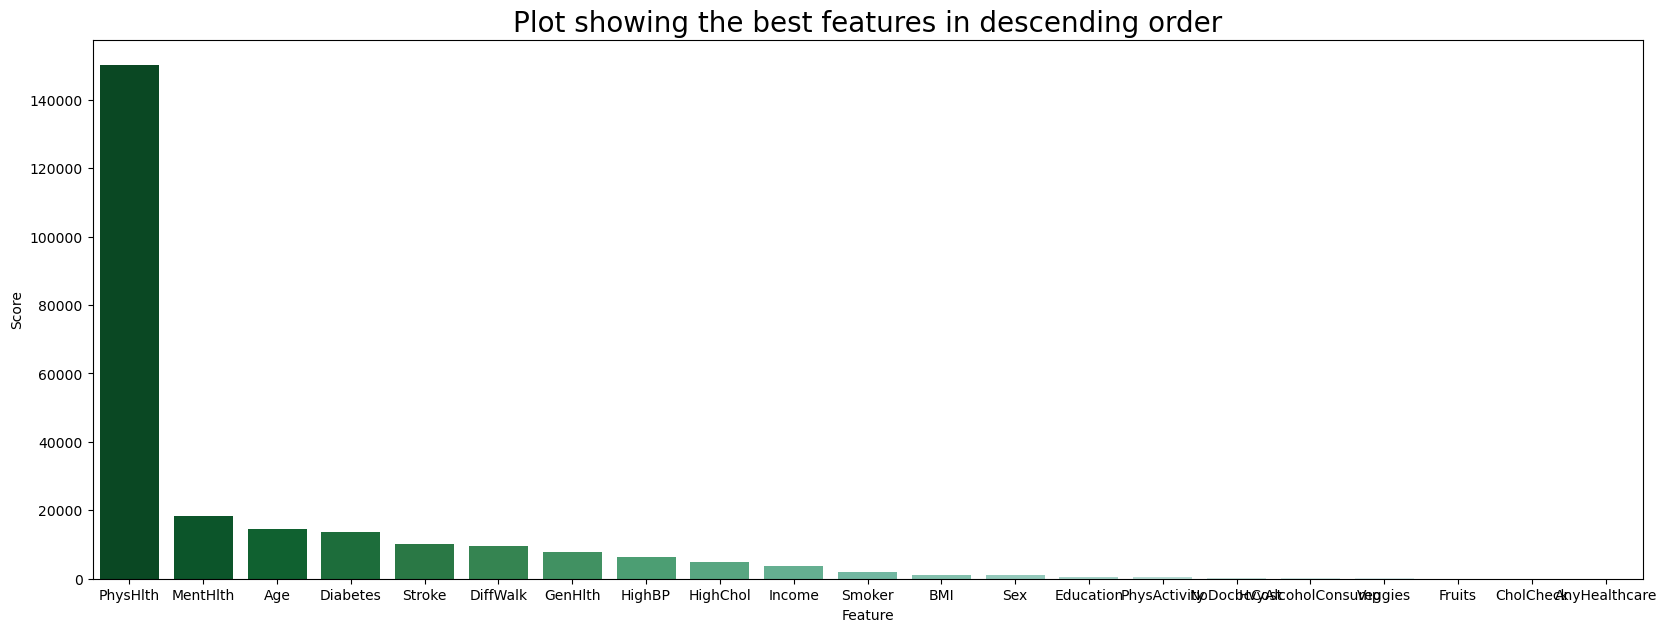

In [11]:
#To visualize feature selection
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores,palette='BuGn_r')
plt.title("Plot showing the best features in descending order", size=20)
plt.show()

In [12]:
#Select 10 features
features=scores["Feature"].tolist()[:10]
features

['PhysHlth',
 'MentHlth',
 'Age',
 'Diabetes',
 'Stroke',
 'DiffWalk',
 'GenHlth',
 'HighBP',
 'HighChol',
 'Income']

### Feature Splitting & Scaling

In [13]:
y = data['HeartDiseaseorAttack']
X = data.drop(['HeartDiseaseorAttack'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [14]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

### Without PCA

In [15]:
#LR
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confussion matrix
[[90953   971]
 [ 8330  1218]]


Accuracy of Logistic Regression: 90.83392462945443 

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     91924
         1.0       0.56      0.13      0.21      9548

    accuracy                           0.91    101472
   macro avg       0.74      0.56      0.58    101472
weighted avg       0.88      0.91      0.88    101472



In [16]:
#KNN
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
knn_conf_matrix = confusion_matrix(test_y, knn_predict)
knn_acc_score = accuracy_score(test_y, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(test_y, knn_predict))

confussion matrix
[[84905  7019]
 [ 7192  2356]]


Accuracy of k-NN Classification: 85.995151371807 

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     91924
         1.0       0.25      0.25      0.25      9548

    accuracy                           0.86    101472
   macro avg       0.59      0.59      0.59    101472
weighted avg       0.86      0.86      0.86    101472



In [18]:
#RF
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=100, random_state=0,max_depth=12)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(test_y,rf_predicted))

confussion matrix
[[91596   328]
 [ 9018   530]]


Accuracy of Random Forest: 90.78957742037213 

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     91924
         1.0       0.62      0.06      0.10      9548

    accuracy                           0.91    101472
   macro avg       0.76      0.53      0.53    101472
weighted avg       0.88      0.91      0.87    101472



In [19]:
#MLP Relu
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Define your neural network model
nn = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=100, random_state=0)

# Train the model with a custom loop to print iterations
for i in range(nn.max_iter):
    nn.partial_fit(train_x, train_y, classes=np.unique(train_y))
    if (i + 1) % 10 == 0:  # Print every 10 iterations
        nn_predicted = nn.predict(test_x)
        nn_acc_score = accuracy_score(test_y, nn_predicted)
        print(f"Iteration {i + 1}, Accuracy: {nn_acc_score * 100:.2f}%")

# Predict using the trained model
nn_predicted = nn.predict(test_x)

# Calculate confusion matrix and accuracy
nn_conf_matrix = confusion_matrix(test_y, nn_predicted)
nn_acc_score = accuracy_score(test_y, nn_predicted)

# Print the final results
print("\nFinal Results:")
print("Confusion matrix")
print(nn_conf_matrix)
print("\n")
print("Accuracy of Neural Network:", nn_acc_score * 100, '\n')
print(classification_report(test_y, nn_predicted))


Iteration 10, Accuracy: 90.89%
Iteration 20, Accuracy: 90.87%
Iteration 30, Accuracy: 90.76%
Iteration 40, Accuracy: 90.67%
Iteration 50, Accuracy: 90.58%
Iteration 60, Accuracy: 90.50%
Iteration 70, Accuracy: 90.41%
Iteration 80, Accuracy: 90.35%
Iteration 90, Accuracy: 90.28%
Iteration 100, Accuracy: 90.16%

Final Results:
Confusion matrix
[[90245  1679]
 [ 8306  1242]]


Accuracy of Neural Network: 90.15984705140335 

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     91924
         1.0       0.43      0.13      0.20      9548

    accuracy                           0.90    101472
   macro avg       0.67      0.56      0.57    101472
weighted avg       0.87      0.90      0.88    101472



In [20]:
#MLP Sigmoid
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Define your neural network model with logistic activation
nn = MLPClassifier(hidden_layer_sizes=(128, 64), activation='logistic', max_iter=100, random_state=0)

# Train the model
nn.fit(train_x, train_y)

# Predict using the trained model
nn_predicted = nn.predict(test_x)

# Calculate confusion matrix and accuracy
nn_conf_matrix = confusion_matrix(test_y, nn_predicted)
nn_acc_score = accuracy_score(test_y, nn_predicted)

# Print the results
print("Confusion matrix")
print(nn_conf_matrix)
print("\n")
print("Accuracy of Neural Network:", nn_acc_score * 100, '\n')
print(classification_report(test_y, nn_predicted))


Confusion matrix
[[91200   724]
 [ 8536  1012]]


Accuracy of Neural Network: 90.87432986439609 

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     91924
         1.0       0.58      0.11      0.18      9548

    accuracy                           0.91    101472
   macro avg       0.75      0.55      0.57    101472
weighted avg       0.88      0.91      0.88    101472



### With PCA

In [21]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)

X_scaled

array([[1.        , 1.        , 1.        , ..., 0.66666667, 0.6       ,
        0.28571429],
       [0.        , 0.        , 0.        , ..., 0.5       , 1.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.66666667, 0.6       ,
        1.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.08333333, 0.8       ,
        0.14285714],
       [1.        , 0.        , 1.        , ..., 0.5       , 0.8       ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.66666667, 1.        ,
        0.14285714]])

In [22]:
from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(X_scaled)

PCA()

In [23]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[18.18850974 11.29364725 10.51486463  9.27208181  7.63235486  6.63842631
  5.54106993  5.18655801  4.05025437  3.69025726  2.84921131  2.47847482
  2.08008725  1.92794536  1.69758539  1.55268509  1.46417574  1.35570579
  1.32915461  1.05332206  0.20362841]



In [24]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 18.18850974  29.48215699  39.99702161  49.26910342  56.90145828
  63.53988459  69.08095452  74.26751254  78.3177669   82.00802416
  84.85723547  87.33571029  89.41579754  91.3437429   93.04132829
  94.59401338  96.05818913  97.41389492  98.74304953  99.79637159
 100.        ]



Text(0, 0.5, 'Explained variance (%)')

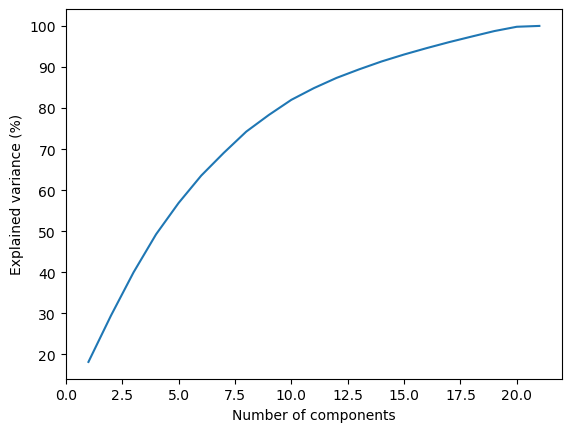

In [25]:
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1),
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Cumulative Variances (Percentage):
[18.18850974 29.48215699 39.99702161 49.26910342 56.90145828 63.53988459
 69.08095452 74.26751254 78.3177669  82.00802416]
Number of components: 10


Text(0, 0.5, 'Explained variance (%)')

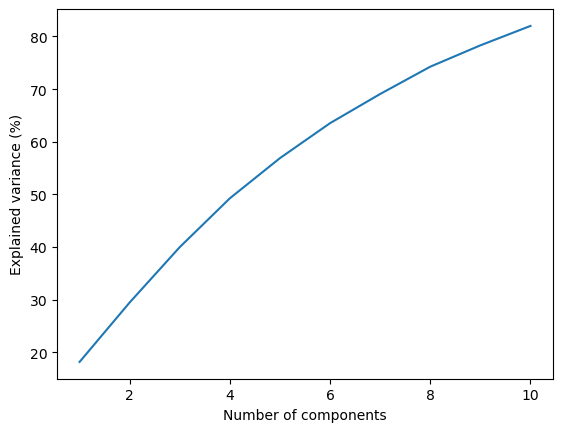

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.8)
pca.fit(X_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [27]:
pca_components = abs(pca.components_)
print(pca_components)

[[5.00067129e-01 4.26674507e-01 2.48044784e-02 3.14319606e-02
  2.93778646e-01 6.61582413e-02 2.36868830e-01 2.81852814e-01
  1.97261454e-01 1.48241294e-01 3.15380891e-03 3.09144687e-03
  5.68640980e-02 2.42817160e-01 9.58995729e-02 2.02094888e-01
  3.10155210e-01 5.36119364e-02 1.49569421e-01 1.01203645e-01
  1.87681442e-01]
 [1.92388624e-01 1.92343832e-01 3.16186541e-02 1.11932451e-03
  3.22425128e-01 1.89827769e-02 7.21954423e-02 3.93304470e-02
  5.53061701e-01 2.33848070e-01 3.32418893e-02 2.84025227e-02
  5.55172837e-03 3.98213752e-02 2.23975503e-02 6.26458592e-02
  1.21565553e-01 6.45949435e-01 9.88749530e-02 1.44842452e-02
  5.81427997e-02]
 [3.03389769e-01 3.90128383e-01 2.69750185e-02 3.91329012e-03
  1.50383773e-02 7.11258253e-03 4.41032082e-02 3.52409986e-01
  3.64396857e-01 2.08589257e-01 2.55225858e-03 4.59639485e-02
  1.04771913e-01 9.87844955e-02 1.20305383e-01 1.41850599e-01
  1.99937276e-01 5.52990258e-01 9.47775053e-02 7.74371628e-02
  1.84662425e-01]
 [1.67719695e-01

In [29]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)

    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]

    # print the top 4 feature names
    print(f'Component {row}: {data.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['HeartDiseaseorAttack', 'HighBP', 'PhysHlth', 'BMI']
Component 1: ['DiffWalk', 'PhysActivity', 'BMI', 'Fruits']
Component 2: ['DiffWalk', 'HighBP', 'PhysActivity', 'Diabetes']
Component 3: ['BMI', 'PhysActivity', 'Fruits', 'HighBP']
Component 4: ['HighBP', 'DiffWalk', 'PhysActivity', 'Diabetes']
Component 5: ['HeartDiseaseorAttack', 'HighBP', 'Diabetes', 'PhysActivity']
Component 6: ['Diabetes', 'PhysHlth', 'MentHlth', 'NoDocbcCost']
Component 7: ['Fruits', 'PhysActivity', 'Diabetes', 'Education']
Component 8: ['Stroke', 'AnyHealthcare', 'HeartDiseaseorAttack', 'GenHlth']
Component 9: ['AnyHealthcare', 'PhysHlth', 'Education', 'HvyAlcoholConsump']


In [30]:
X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)


(253680, 10)
[[ 1.58826607 -0.1714319   0.71770994 ... -0.54638547 -0.44593293
  -0.22716062]
 [-0.04435574  0.64279379  1.08957972 ...  0.71335366 -0.25815039
   1.01279667]
 [ 1.30329461 -0.81721758  0.66831231 ...  0.52082805 -0.80585016
   0.10309482]
 ...
 [-0.75975052 -0.21488999  0.54185233 ...  0.98564156 -0.0068869
   0.16635165]
 [ 0.13625343 -0.02519642 -0.13465252 ... -0.15938956 -0.23015071
   0.38319266]
 [ 0.53047587 -0.74230809 -0.24198373 ...  0.97242776  0.6418611
   0.30534252]]


In [36]:
import time
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Perform PCA on the training and test data
n_components = 10  # You can adjust the number of components as needed
pca = PCA(n_components=n_components)
train_x_pca = pca.fit_transform(train_x)
test_x_pca = pca.transform(test_x)

# Create and train the Logistic Regression model
log_reg = LogisticRegression()
start = time.time()
log_reg.fit(train_x_pca, train_y)
end = time.time()

# Make predictions on the test data
y_pred = log_reg.predict(test_x_pca)

# Calculate accuracy
accuracy = accuracy_score(test_y, y_pred)
training_time = end - start

print("Accuracy:", accuracy)
print("Training Time:", training_time)


Accuracy: 0.9064569536423841
Training Time: 0.21797585487365723


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import time

# Perform PCA on the training and test data
n_components = 10  # You can adjust the number of components as needed
pca = PCA(n_components=n_components)
train_x_pca = pca.fit_transform(train_x)
test_x_pca = pca.transform(test_x)

t1 = time.time()

# Instantiate model with 200 decision trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on PCA-transformed training data
rf.fit(train_x_pca, train_y)

t2 = time.time()

# Make predictions on the PCA-transformed test data
y_pred_rf = rf.predict(test_x_pca)

# Calculate Mean Squared Error (MSE) as a regression metric
mse = mean_squared_error(test_y, y_pred_rf)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", np.sqrt(mse))
print("Training Time:", t2 - t1)

cnm=confusion_matrix(test_y, y_pred_rf.round())

print(cnm)
correct_ones=accuracy_score(test_y, y_pred_rf.round(), normalize=False)
print(correct_ones)
print("Accuracy is: ",correct_ones/test_x.shape[0])

KeyboardInterrupt: 

In [39]:
#KNN
import time
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Perform PCA on the training and test data
n_components = 10  # You can adjust the number of components as needed
pca = PCA(n_components=n_components)
train_x_pca = pca.fit_transform(train_x)
test_x_pca = pca.transform(test_x)

# Create and train the K-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier()
start = time.time()
knn.fit(train_x_pca, train_y)
end = time.time()

# Make predictions on the test data
y_pred = knn.predict(test_x_pca)

# Calculate accuracy
accuracy = accuracy_score(test_y, y_pred)
training_time = end - start

print("Accuracy:", accuracy)
print("Training Time:", training_time)


Accuracy: 0.8962373856827499
Training Time: 1.1860458850860596


In [42]:
#MLP Relu
import time
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Perform PCA on the training and test data
n_components = 10  # You can adjust the number of components as needed
pca = PCA(n_components=n_components)
train_x_pca = pca.fit_transform(train_x)
test_x_pca = pca.transform(test_x)

# Create and configure the Multi-Layer Perceptron (MLP) model
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=100, random_state=0)

# Train the model with a custom loop to print iterations
max_iterations = 100  # Adjust the maximum number of iterations as needed
for i in range(max_iterations):
    mlp.partial_fit(train_x_pca, train_y, classes=np.unique(train_y))
    if (i + 1) % 10 == 0:  # Print every 10 iterations
        mlp_predicted = mlp.predict(test_x_pca)
        mlp_acc_score = accuracy_score(test_y, mlp_predicted)
        print(f"Iteration {i + 1}, Accuracy: {mlp_acc_score * 100:.2f}%")

# Predict using the trained model
mlp_predicted = mlp.predict(test_x_pca)

# Calculate confusion matrix and accuracy
mlp_conf_matrix = confusion_matrix(test_y, mlp_predicted)
mlp_acc_score = accuracy_score(test_y, mlp_predicted)

# Print the final results
print("\nFinal Results:")
print("Confusion matrix")
print(mlp_conf_matrix)
print("\n")
print("Accuracy of Neural Network:", mlp_acc_score * 100, '\n')
print(classification_report(test_y, mlp_predicted))




Iteration 10, Accuracy: 90.68%
Iteration 20, Accuracy: 90.72%
Iteration 30, Accuracy: 90.71%
Iteration 40, Accuracy: 90.71%
Iteration 50, Accuracy: 90.70%
Iteration 60, Accuracy: 90.69%
Iteration 70, Accuracy: 90.69%
Iteration 80, Accuracy: 90.67%
Iteration 90, Accuracy: 90.65%
Iteration 100, Accuracy: 90.63%

Final Results:
Confusion matrix
[[91442   482]
 [ 9021   527]]


Accuracy of Neural Network: 90.63485493535163 

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     91924
         1.0       0.52      0.06      0.10      9548

    accuracy                           0.91    101472
   macro avg       0.72      0.52      0.53    101472
weighted avg       0.87      0.91      0.87    101472



In [ ]:
#MLP Sigmoid
import time
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Perform PCA on the training and test data
n_components = 10  # You can adjust the number of components as needed
pca = PCA(n_components=n_components)
train_x_pca = pca.fit_transform(train_x)
test_x_pca = pca.transform(test_x)

# Create and configure the Multi-Layer Perceptron (MLP) model
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='logistic', max_iter=100, random_state=0)

# Train the model with a custom loop to print iterations
max_iterations = 100  # Adjust the maximum number of iterations as needed
for i in range(max_iterations):
    mlp.partial_fit(train_x_pca, train_y, classes=np.unique(train_y))
    if (i + 1) % 10 == 0:  # Print every 10 iterations
        mlp_predicted = mlp.predict(test_x_pca)
        mlp_acc_score = accuracy_score(test_y, mlp_predicted)
        print(f"Iteration {i + 1}, Accuracy: {mlp_acc_score * 100:.2f}%")

# Predict using the trained model
mlp_predicted = mlp.predict(test_x_pca)

# Calculate confusion matrix and accuracy
mlp_conf_matrix = confusion_matrix(test_y, mlp_predicted)
mlp_acc_score = accuracy_score(test_y, mlp_predicted)

# Print the final results
print("\nFinal Results:")
print("Confusion matrix")
print(mlp_conf_matrix)
print("\n")
print("Accuracy of Neural Network:", mlp_acc_score * 100, '\n')
print(classification_report(test_y, mlp_predicted))


Iteration 10, Accuracy: 90.62%
Iteration 20, Accuracy: 90.65%
Iteration 30, Accuracy: 90.64%
Iteration 40, Accuracy: 90.66%
Iteration 50, Accuracy: 90.65%
Iteration 60, Accuracy: 90.64%
Iteration 70, Accuracy: 90.64%
Iteration 80, Accuracy: 90.66%
Iteration 90, Accuracy: 90.68%
